In [1]:
import cv2
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Eigenfaces

## Obtain facial image dataset

In [ ]:
!./get_data.sh

## Create a data matrix

In [2]:
data_dir = "lfw_funneled"

In [3]:
def read_images(data_dir):
    filenames = [img for img in glob.glob(os.path.join(data_dir, "*", "*.jpg"))]
    return [cv2.imread(f) for f in filenames]
    

In [5]:
img = read_images(data_dir)

Image Shape: (Height: 250, Width: 250, Length: 3)


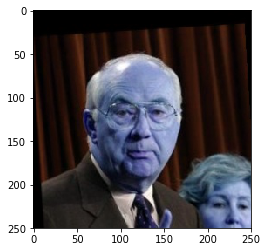

In [12]:
sz = img[0]
print("Image Shape: (Height: %s, Width: %s, Length: %s)"%sz.shape)

plt.imshow(sz)
plt.show()

In [14]:
def createDataMatrix(images):
    print("Creating data matrix",end=" ... ")
    ''' 
    Allocate space for all images in one data matrix. 
        The size of the data matrix is
        ( w  * h  * 3, numImages )
        
        where,
         
        w = width of an image in the dataset.
        h = height of an image in the dataset.
        3 is for the 3 color channels.
        '''
   
    numImages = len(images)
    sz = images[0].shape
    data = np.zeros((numImages, sz[0] * sz[1] * sz[2]), dtype=np.float32)
    for i in range(numImages):
        image = images[i].flatten()
        data[i,:] = image
     
    print("DONE")
    return data

In [15]:
# Create data matrix for PCA
data = createDataMatrix(img)

Creating data matrix ... DONE


We wll convert the data matrix into the form of 

X $\in \mathbb{R}^{M \times N}$

where $M$ is the size of each image flattened and $N$ is number of images.

## Calculate the Mean Vector and Principal Components

In [16]:
NUM_EIGEN_FACES = 10
MAX_SLIDER_VALUE = 255

### Calculating PCA

In [17]:
print("Calculating PCA ", end="...")
mean, eigenVectors = cv2.PCACompute(data, mean=None, maxComponents=NUM_EIGEN_FACES)
print ("DONE")

Calculating PCA ...DONE


In short, PCA draws out the "most important" vectors that can be used to describe the dataset.  (For more information, checkout PCA).

## Reshape Eigenvectors to obtain Eigenface

In [22]:
averageFace = mean.reshape(sz.shape)
eigenFaces = []; 

for eigenVector in eigenVectors:
    eigenFace = eigenVector.reshape(sz.shape)
    eigenFaces.append(eigenFace)
 

In [ ]:
def createNewFace(*args):
    # Start with the mean image
    output = averageFace
     
    # Add the eigen faces with the weights
    for i in range(0, NUM_EIGEN_FACES):
        '''
        OpenCV does not allow slider values to be negative. 
        So we use weight = sliderValue - MAX_SLIDER_VALUE / 2
        '''
        sliderValues[i] = cv2.getTrackbarPos("Weight" + str(i), "Trackbars");
        weight = sliderValues[i] - MAX_SLIDER_VALUE/2
        output = np.add(output, eigenFaces[i] * weight)
 
    # Display Result at 2x size
    output = cv2.resize(output, (0,0), fx=2, fy=2)
    cv2.imshow("Result", output)

In [24]:
def resetSliderValues(*args):
    for i in range(0, NUM_EIGEN_FACES):
        cv2.setTrackbarPos("Weight" + str(i), "Trackbars", MAX_SLIDER_VALUE/2); 
    createNewFace()

In [ ]:
# Compute the eigenvectors from the stack of images created

# Create window for displaying Mean Face
cv2.namedWindow("Result", cv2.WINDOW_AUTOSIZE)

# Display result at 2x size
output = cv2.resize(averageFace, (0,0), fx=2, fy=2)
cv2.imshow("Result", output)

# Create Window for trackbars
cv2.namedWindow("Trackbars", cv2.WINDOW_AUTOSIZE)

sliderValues = []

# Create Trackbars
for i in range(NUM_EIGEN_FACES):
    sliderValues.append(MAX_SLIDER_VALUE//2)
    cv2.createTrackbar( "Weight" + str(i), "Trackbars", MAX_SLIDER_VALUE//2, MAX_SLIDER_VALUE, createNewFace)

# You can reset the sliders by clicking on the mean image.
cv2.setMouseCallback("Result", resetSliderValues);

print('''Usage:
Change the weights using the sliders
Click on the result window to reset sliders
Hit ESC to terminate program.''')

cv2.waitKey(0)
cv2.destroyAllWindows()

Usage:
Change the weights using the sliders
Click on the result window to reset sliders
Hit ESC to terminate program.


NameError: name 'xrange' is not defined

TypeError: integer argument expected, got float

TypeError: integer argument expected, got float

## Citations

Source Code:  https://www.learnopencv.com/eigenface-using-opencv-c-python/